In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from random import shuffle
# import umap
# from PIL import Image
# from scipy import misc
# from os import listdir
# from os.path import isfile, join
# import numpy as np
# from scipy import misc
# from random import shuffle
# from collections import Counter
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.utils.np_utils import to_categorical


In [ ]:
!pip install opendatasets

In [5]:
import opendatasets as od

In [6]:
od.download(
    "https://www.kaggle.com/datasets/jangedoo/utkface-new")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ikbalunal
Your Kaggle Key: ··········


100%|██████████| 331M/331M [00:03<00:00, 106MB/s]


In [7]:
os.chdir('/content/utkface-new/utkface_aligned_cropped')

In [8]:
os.chdir('/content/utkface-new/UTKFace')

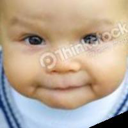

In [9]:
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

In [50]:
onlyfiles = os.listdir()

In [51]:
len(onlyfiles)

23708

In [57]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [13]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [58]:
def classAge(i):
    if i <= 14:
        return int(0)
    if (i>14) and (i<=25):
        return int(1)
    if (i>25) and (i<40):
        return int(2)
    if (i>=40) and (i<60):
        return int(3)
    if i>=60:
        return int(4)

In [14]:
import imageio

In [59]:
ham =[]
sonuclanacak = []
for file in onlyfiles:
    face = imageio.imread(file)
    face =cv2.resize(face, (32, 32) )
    ham.append(face.flatten())
    sonuclanacak.append(classAge(int(file.split('_')[0])))

In [60]:
duzenli_veriler=np.array(ham) 
sonuc=np.array(sonuclanacak)
df=pd.DataFrame(duzenli_veriler)
# sonuc kolonumu ekliyorum
df['Sonuc']=sonuc

In [62]:
df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Sonuc
0,15,25,28,4,9,12,0,4,5,2,...,184,138,114,190,129,108,184,127,102,2
1,23,39,53,18,37,52,9,29,47,0,...,51,68,75,61,68,82,168,177,185,2
2,90,90,90,57,60,65,82,78,79,114,...,12,12,12,16,16,16,14,14,14,3
3,31,20,16,40,29,25,47,36,33,34,...,228,228,226,236,236,236,238,238,238,1
4,230,225,219,233,228,222,225,220,214,122,...,155,149,151,163,159,164,159,156,165,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,35,34,3,42,34,15,64,47,35,87,...,118,151,93,118,148,94,122,150,99,3
23704,48,21,10,91,48,33,135,79,62,190,...,55,48,48,87,83,84,101,99,102,2
23705,125,170,229,121,174,228,115,163,217,104,...,74,103,157,127,157,214,136,170,227,0
23706,152,151,148,66,54,44,80,57,43,101,...,0,0,0,0,0,0,0,0,0,2


In [65]:
x = df.drop(columns='Sonuc')

In [ ]:
x

In [67]:
y= df['Sonuc']

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [70]:
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred_train = lr.predict(x_train)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.6647017719618542

In [101]:
lr.predict(x_test[3005:3006])

array([3.40885902])

In [102]:
y_test[3005:3006]

3297    3
Name: Sonuc, dtype: int64